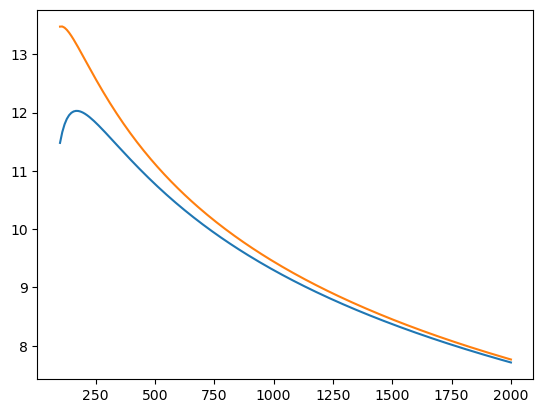

In [1]:
import numpy as np
from scipy.integrate import trapezoid, simpson
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import os 
import sys

sys.path.append(os.path.join(os.path.dirname(os.getcwd()),'Classes'))

import Handle_PotFiles
import EAM_Fitting_Serial

if os.path.basename(os.getcwd()) != 'Potentials':
    os.chdir('../Potentials')

# pot_dict, _, pot_params = Handle_PotFiles.read_pot('test.0.eam.alloy')
pot_dict, potlines, pot_params = Handle_PotFiles.read_pot('../../Fitting_Runtime/Potentials/optim.0.eam.alloy')

pot_dict2, _, pot_params2 = Handle_PotFiles.read_pot('WHHe_test.eam.alloy')

def Beck1968(r):

    A = 398.7
    a = 0.675
    alpha = 4.390
    beta = 3.746e-4

    return  A*np.exp(-alpha*r - beta*r**6) - (0.869/((r**2 + a**2)**3)) * (1 + ((2.709 + 3*a**2)/(r**2 + a**2)))

def eam(pot, r, dr):
    
    r_idx = int(r // dr)
    
    if r_idx >= len(pot) -1:

        return 0
    
    else:
        x = (r % dr) / dr

        y1 = pot[r_idx]

        y2 = pot[r_idx + 1]

        return (y2 - y1)*x + y1

def virial_2(r, phi, T):

    kb = 8.6173303e-5
    beta = 1 / (kb * T)
    y = ( 1 - np.exp(-beta * phi) ) * r**2

    return 2* np.pi* (trapezoid(y, r) + r[0]**3/3)

# phi = data[:,2]
r = np.linspace(0.1, 5, 100)

r_pot = np.linspace(0, pot_params['rc'], pot_params['Nr'])

he_he = pot_dict['He-He'][1:]/r_pot[1:]

phi_eam = np.zeros((len(r),))

for i in range(len(r)):

    phi_eam[i] = eam(he_he, r[i], pot_params['dr'])

phi = Beck1968(r)

N = 200

kb = 8.6173303e-5

T_arr = np.linspace(100, 2000, N)

B2 = np.zeros(T_arr.shape)

B2_eam = np.zeros(T_arr.shape)

for i, T in enumerate(T_arr):

    B2[i] = virial_2(r, phi, T)

    B2_eam[i] = virial_2(r, phi_eam, T)

conv = 6.02214e-1

B2 = B2*conv
B2_eam *= conv
plt.plot(T_arr, B2)
plt.plot(T_arr, B2_eam)

# print(B2.max(), T_arr[B2.argmax()])

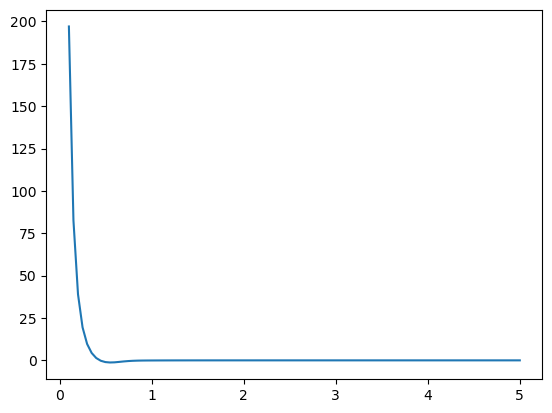

In [2]:
# plt.plot(r[:-40], phi_eam[:-40])
# plt.plot(r[:-40], phi[:-40])

plt.plot(r, phi_eam - phi)

In [3]:
zbl = EAM_Fitting_Serial.ZBL(2, 2)

r = np.linspace(0.9, 5, 100)

r_pot = np.linspace(0, pot_params['rc'], pot_params['Nr'])

he_he2 = pot_dict2['He-He'][1:]/r_pot[1:]

phi_eam2 = np.zeros((len(r),))

for i in range(len(r)):

    phi_eam2[i] = eam(he_he2, r[i], pot_params['dr'])

y = phi_eam - zbl.eval_zbl(r)

fit = np.polyfit(r, y, deg=9)

plt.plot(r, phi_eam - zbl.eval_zbl(r), label='our-work')
plt.plot(r, phi_eam2 - zbl.eval_zbl(r), label='Beck1968')
plt.plot(r, np.polyval(fit, r))

plt.title('He-He Pair Potential')
plt.xlabel('radial distance / A')
plt.ylabel('Energy / eV')
plt.legend()

ValueError: operands could not be broadcast together with shapes (4999,) (1249,) 

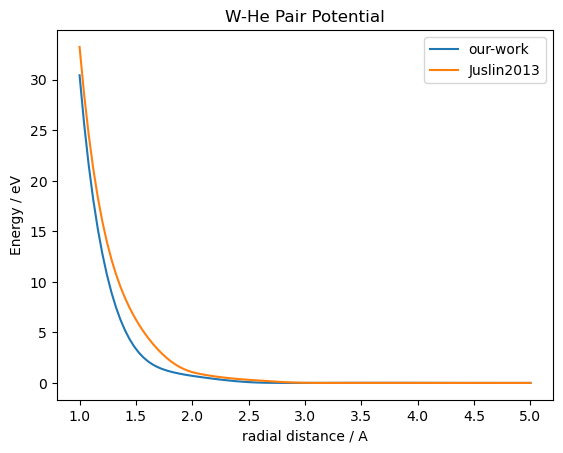

In [ ]:
zbl = EAM_Fitting_Serial.ZBL(74, 2)

r = np.linspace(1, 5, 100)

r_pot = np.linspace(0, pot_params['rc'], pot_params['Nr'])

w_he2 = pot_dict2['W-He'][1:]/r_pot[1:]

phi_eam2 = np.zeros((len(r),))

for i in range(len(r)):

    phi_eam2[i] = eam(w_he2, r[i], pot_params['dr'])

r_pot = np.linspace(0, pot_params['rc'], pot_params['Nr'])

w_he = pot_dict['W-He'][1:]/r_pot[1:]

phi_eam = np.zeros((len(r),))

for i in range(len(r)):

    phi_eam[i] = eam(w_he, r[i], pot_params['dr'])

plt.plot(r, phi_eam, label='our-work')
plt.plot(r, phi_eam2, label='Juslin2013')

plt.title('W-He Pair Potential')
plt.xlabel('radial distance / A')
plt.ylabel('Energy / eV')
plt.legend()

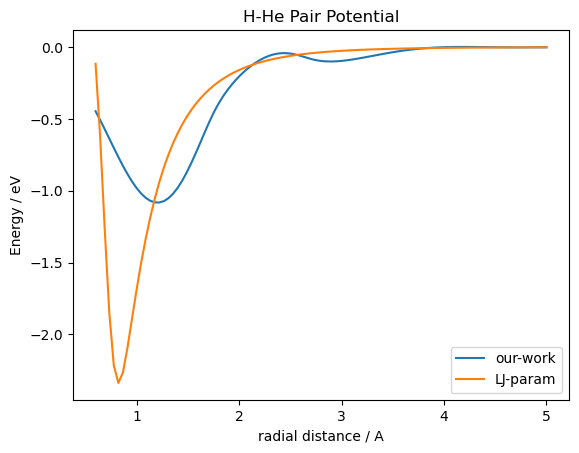

In [ ]:
zbl = EAM_Fitting_Serial.ZBL(1, 2)

r = np.linspace(0.6, 5, 100)

r_pot = np.linspace(0, pot_params['rc'], pot_params['Nr'])

h_he2 = pot_dict2['H-He'][1:]/r_pot[1:]

phi_eam2 = np.zeros((len(r),))

for i in range(len(r)):

    phi_eam2[i] = eam(h_he2, r[i], pot_params['dr'])


h_he = pot_dict['H-He'][1:]/r_pot[1:]

phi_eam = np.zeros((len(r),))

for i in range(len(r)):

    phi_eam[i] = eam(h_he, r[i], pot_params['dr'])

plt.plot(r, phi_eam- zbl.eval_zbl(r), label='our-work')
plt.plot(r, phi_eam2- zbl.eval_zbl(r), label='LJ-param')


plt.title('H-He Pair Potential')
plt.xlabel('radial distance / A')
plt.ylabel('Energy / eV')
plt.legend()

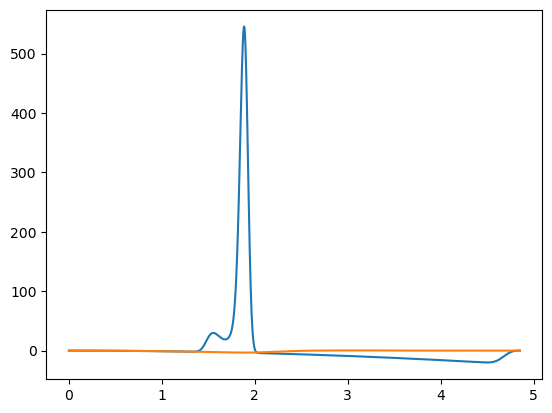

In [ ]:
pot_dict, _, pot_params = Handle_PotFiles.read_pot('test.0.eam.alloy')
pot_dict2, _, pot_params = Handle_PotFiles.read_pot('WHHe_test.eam.alloy')

r_pot = np.linspace(0, pot_params['rc'], pot_params['Nr'])[1:]

kb = 8.6173303e-5

T = np.linspace(300, 1000, 20)

virial_eam = []
virial_beck = []

eam = pot_dict['He-He'][1:]/r_pot

beck = pot_dict2['He-He'][1:]/r_pot

beta = 1 / (kb * 300)
plt.plot(r_pot, (np.exp(-beta*eam) - 1) * r_pot**2)
plt.plot(r_pot, (np.exp(-beta*beck) - 1) * r_pot**2)

[[2.47734287e+01 5.94121916e-01]
 [2.92941502e+01 2.40776488e+00]
 [3.07958539e+01 3.83040639e+00]
 [3.68588657e+01 5.40986938e+00]
 [4.17479885e+01 6.53497823e+00]
 [4.46858331e+01 7.17968070e+00]
 [4.75019178e+01 8.38570392e+00]
 [5.37647405e+01 9.02532656e+00]
 [6.15199008e+01 9.93664731e+00]
 [6.60125239e+01 1.03170537e+01]
 [7.25313543e+01 1.06944122e+01]
 [8.24001392e+01 1.14797533e+01]
 [9.07328778e+01 1.17820755e+01]
 [1.17039231e+02 1.21403483e+01]
 [1.41069613e+02 1.20965893e+01]
 [1.67450895e+02 1.21365022e+01]
 [1.93516850e+02 1.21478229e+01]
 [2.41917917e+02 1.21190856e+01]
 [2.67315755e+02 1.20323657e+01]
 [2.91396089e+02 1.19211176e+01]
 [2.68130785e+02 1.18153354e+01]
 [3.17493260e+02 1.16470198e+01]
 [3.69327808e+02 1.14298383e+01]
 [4.19601366e+02 1.11111245e+01]
 [4.67439296e+02 1.10837355e+01]
 [5.70002943e+02 1.08218509e+01]
 [6.68648934e+02 1.04696549e+01]
 [7.63553410e+02 1.01675917e+01]
 [8.72549304e+02 9.91475627e+00]
 [1.07102569e+03 9.29054054e+00]
 [1.264564

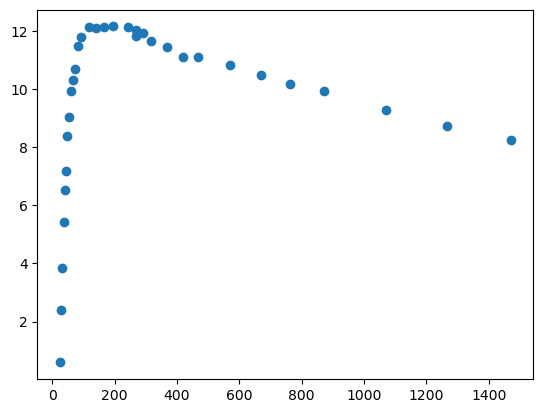

In [ ]:
data = np.loadtxt('../he-he_data.txt')
plt.scatter(data[:,0], data[:,1])

print(data)